In [1]:
#https://www.kaggle.com/code/prasad22/starter-eda-with-animated-plot-on-g20nations/notebook

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import math
!pip install bar-chart-race
!pip install ffmpeg-python
import bar_chart_race as bcr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 1.2 MB/s eta 0:00:00


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [6]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
#Reading the Historical Public Debt Database
HPDD = pd.read_csv("/content/Historical Public Debt Database.csv")
HPDD.columns.values

array(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'Attribute', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1813',
       '1814', '1815', '1816', '1817', '1818', '1819', '1820', '1821',
       '1822', '1823', '1824', '1825', '1826', '1827', '1828', '1829',
       '1830', '1831', '1832', '1833', '1834', '1835', '1836', '1837',
       '1838', '1839', '1840', '1841', '1842', '1843', '1844', '1845',
       '1846', '1847', '1848', '1849', '1850', '1851', '1852', '1853',
       '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861',
       '1862', '1863', '1864', '1865', '1866', '1867', '1868', '1869',
       '1870', '1871', '1872', '1873', '1874', '1875', '1876', '1877',
       '1878', '1879', '1880', '1881', '1882', '1883', '1884', '1885',
       '1886', '1887', '1888', '1889', '1890', '1891', '1892', '1893',
       '1894', '1895', '1896', '1897', '1898', '1899', '1900', '1901',
     

In [8]:
HPDD.head()

Country Name  Country Code     Indicator Name Indicator Code Attribute  \
0     Portugal           182  Debt to GDP Ratio     GGXWDG_GDP     Value   
1        Qatar           453  Debt to GDP Ratio     GGXWDG_GDP     Value   
2      Romania           968  Debt to GDP Ratio     GGXWDG_GDP     Value   
3       Russia           922  Debt to GDP Ratio     GGXWDG_GDP     Value   
4       Rwanda           714  Debt to GDP Ratio     GGXWDG_GDP     Value   

   1800  1801  1802  1803  1804  1805  1806  1807  1808  1809  1810  1811  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1812  1813  1814  1815  1816  1817  1818  1819  1820  1821  1822  1823  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1824  1825  1826  1827  1828  1829  1830  1831  1832  1833  1834  1835  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1836  1837  1838  1839  1840  1841  1842  1843  1844  1845  1846  1847  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1848  1849  1850       1851       1852       1853       1854       1855  \
0   NaN   NaN   NaN  29.472475  27.271156  23.163207  28.298822  26.918481   
1   NaN   NaN   NaN        NaN        NaN        NaN        NaN        NaN   
2   NaN   NaN   NaN        NaN        NaN        NaN        NaN        NaN   
3   NaN   NaN   NaN        NaN        NaN        NaN        NaN        NaN   
4   NaN   NaN   NaN        NaN        NaN        NaN        NaN        NaN   

        1856       1857      1858      1859       1860       1861       1862  \
0  26.049842  28.806607  28.16817  29.42718  32.494767  33.514662  32.887295   
1        NaN        NaN       NaN       NaN        NaN        NaN        NaN   
2        NaN        NaN       NaN       NaN        NaN        NaN        NaN   
3        NaN        NaN       NaN       NaN        NaN        NaN        NaN   
4        NaN        NaN       NaN       NaN        NaN        NaN        NaN   

        1863       1864       1865       1866       1867       1868  \
0  33.388222  35.952642  38.553917  40.140293  40.680282  46.292442   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

        1869       1870       1871       1872       1873       1874  \
0  48.863347  50.267264  59.473151  55.948914  52.698128  55.101656   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        N

In [9]:
#Dropping unwanted variables
HPDD = HPDD.drop(["Indicator Name","Indicator Code","Attribute","Unnamed: 221"],axis=1)

In [10]:
#Flattening the time series data
years = list(HPDD.columns[2:].values)
HPDD = pd.melt(HPDD,id_vars =['Country Name', 'Country Code'],
               value_vars =years,
              var_name ='Year', value_name ='Debt to GDP Ratio')

In [11]:
HPDD.dtypes

Country Name          object
Country Code           int64
Year                  object
Debt to GDP Ratio    float64
dtype: object

In [12]:
HPDD["Year"] = HPDD["Year"].astype(str)

In [13]:
df_pivot = pd.pivot_table(HPDD, values='Debt to GDP Ratio', index=['Year'],
                          columns=['Country Name'], aggfunc='sum', fill_value=0)
df_pivot

Country Name  Afghanistan    Albania    Algeria      Angola   Anguilla  \
Year                                                                     
1800             0.000000   0.000000   0.000000    0.000000   0.000000   
1801             0.000000   0.000000   0.000000    0.000000   0.000000   
1802             0.000000   0.000000   0.000000    0.000000   0.000000   
1803             0.000000   0.000000   0.000000    0.000000   0.000000   
1804             0.000000   0.000000   0.000000    0.000000   0.000000   
1805             0.000000   0.000000   0.000000    0.000000   0.000000   
1806             0.000000   0.000000   0.000000    0.000000   0.000000   
1807             0.000000   0.000000   0.000000    0.000000   0.000000   
1808             0.000000   0.000000   0.000000    0.000000   0.000000   
1809             0.000000   0.000000   0.000000    0.000000   0.000000   
1810             0.000000   0.000000   0.000000    0.000000   0.000000   
1811             0.000000   0.000000   0.000000    0.000000   0.000000   
1812             0.000000   0.000000   0.000000    0.000000   0.000000   
1813             0.000000   0.000000   0.000000    0.000000   0.000000   
1814             0.000000   0.000000   0.000000    0.000000   0.000000   
1815             0.000000   0.000000   0.000000    0.000000   0.000000   
1816             0.000000   0.000000   0.000000    0.000000   0.000000   
1817             0.000000   0.000000   0.000000    0.000000   0.000000   
1818             0.000000   0.000000   0.000000    0.000000   0.000000   
1819             0.000000   0.000000   0.000000    0.000000   0.000000   
1820             0.000000   0.000000   0.000000    0.000000   0.000000   
1821             0.000000   0.000000   0.000000    0.000000   0.000000   
1822             0.000000   0.000000   0.000000    0.000000   0.000000   
1823             0.000000   0.000000   0.000000    0.000000   0.000000   
1824             0.000000   0.000000   0.000000    0.000000   0.000000   
1825             0.000000   0.000000   0.000000    0.000000   0.000000   
1826             0.000000   0.000000   0.000000    0.000000   0.000000   
1827             0.000000   0.000000   0.000000    0.000000   0.000000   
1828             0.000000   0.000000   0.000000    0.000000   0.000000   
1829             0.000000   0.000000   0.000000    0.000000   0.000000   
1830             0.000000   0.000000   0.000000    0.000000   0.000000   
1831             0.000000   0.000000   0.000000    0.000000   0.000000   
1832             0.000000   0.000000   0.000000    0.000000   0.000000   
1833             0.000000   0.000000   0.000000    0.000000   0.000000   
1834             0.000000   0.000000   0.000000    0.000000   0.000000   
1835             0.000000   0.000000   0.000000    0.000000   0.000000   
1836             0.000000   0.000000   0.000000    0.000000   0.000000   
1837             0.000000   0.000000   0.000000    0.000000   0.000000   
1838             0.000000   0.000000   0.000000    0.000000   0.000000   
1839             0.000000   0.000000   0.000000    0.000000   0.000000   
1840             0.000000   0.000000   0.000000    0.000000   0.000000   
1841             0.000000   0.000000   0.000000    0.000000   0.000000   
1842             0.000000   0.000000   0.000000    0.000000   0.000000   
1843             0.000000   0.000000   0.000000    0.000000   0.000000   
1844             0.000000   0.000000   0.000000    0.000000   0.000000   
1845             0.000000   0.000000   0.000000    0.000000   0.000000   
1846             0.000000   0.000000   0.000000    0.000000   0.000000   
1847             0.000000   0.000000   0.000000    0.000000   0.000000   
1848             0.000000   0.000000   0.000000    0.000000   0.000000   
1849             0.000000   0.000000   0.000000    0.000000   0.000000   
1850             0.000000   0.000000   0.000000    0.000000   0.000000   
1851             0.000000   0.000000   0.000000    0.000000   0.000000   
1852

In [14]:
# Find the country with the highest and lowest debt-to-GDP ratio for each year
max_df = HPDD.loc[HPDD.groupby('Year')['Debt to GDP Ratio'].idxmax()]
min_df = HPDD.loc[HPDD.groupby('Year')['Debt to GDP Ratio'].idxmin()]

# Create the interactive subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=("Country with highest debt-to-GDP ratio",
                                    "Country with lowest debt-to-GDP ratio"))

# Add the scatter plots for the highest and lowest ratios
fig.add_trace(go.Scatter(x=max_df['Year'], y=max_df['Debt to GDP Ratio'],
                         mode='markers', marker=dict(size=10, color='red'),
                         hovertext=max_df['Country Name'], name='Highest'), row=1, col=1)
fig.add_trace(go.Scatter(x=min_df['Year'], y=min_df['Debt to GDP Ratio'],
                         mode='markers', marker=dict(size=10, color='blue'),
                         hovertext=min_df['Country Name'], name='Lowest'), row=2, col=1)

# Update the axis and layout properties
fig.update_layout(height=800, title_text="Debt-to-GDP Ratio by Country and Year",
                  xaxis=dict(title="Year"), yaxis=dict(title="Debt to GDP Ratio"))

# Show the plot
fig.show()

In [15]:
G20_Nations = HPDD[HPDD["Country Name"].isin(["Argentina","Australia","Brazil","Canada","China",
                                              "Euro area","France","Germany","India","Indonesia",
                                              "Italy","Japan","Korea","Mexico","Russia","Saudi Arabia"
                                              ,"South Africa","Turkey","United Kingdom","United States"])]

In [16]:
G20_pivot = pd.pivot_table(G20_Nations, values='Debt to GDP Ratio', index=['Year'],
                           columns=['Country Name'], aggfunc='sum', fill_value=0)

In [17]:
bcr.bar_chart_race(df = G20_pivot,
                   n_bars = 20,
                   sort='desc',
                   title='Debt-To-GDP Ratio',
                   dpi=100,
                   steps_per_period=1,
                   period_length=1000)

In [18]:
# Summary statistics for Debt-to-GDP Ratio by year
G20_Nations.groupby('Year')['Debt to GDP Ratio'].describe()

# Summary statistics for Debt-to-GDP Ratio by country
G20_Nations.groupby('Country Name')['Debt to GDP Ratio'].describe()

count        mean        std        min        25%  \
Country Name                                                         
Argentina       117.0   50.791834  27.185182   9.347420  33.667569   
Australia       111.0   51.674653  35.113359   9.682676  23.213111   
Brazil          109.0   51.761209  27.222013  10.642757  30.823111   
Canada          146.0   62.138196  27.705148  18.445006  40.921172   
China            32.0   20.162956  12.421483   0.971136   6.659085   
Euro area        21.0   75.463102  10.238533  64.903590  68.032888   
France          112.0   73.863105  50.210686  14.388017  32.802367   
Germany         113.0   36.657211  17.774360   4.169661  20.104092   
India            65.0   50.079912  19.566994  24.999195  35.993487   
Indonesia        40.0   38.019346  18.568973  16.430100  24.808902   
Italy           155.0   84.927293  32.022708  24.213945  60.275516   
Japan           140.0   60.881925  59.479670   4.438238  22.811377   
Korea            56.0   17.037302   8.936470   2.631236   9.987567   
Mexico           93.0   28.549708  18.469075   0.072204  14.610449   
Russia           53.0   53.257457  26.765157   7.425429  37.472145   
Saudi Arabia     25.0   49.884826  37.021115   1.567105  12.055995   
South Africa    102.0   56.528960  23.583256  23.198200  38.200898   
Turkey           65.0   35.154797  12.072866  18.263554  27.644993   
United Kingdom  216.0  114.613486  67.309219  27.271153  47.030578   
United States   213.0   30.343693  28.494901   0.021858   7.434861   

                       50%         75%         max  
Country Name                                        
Argentina        46.623333   60.603656  152.111761  
Australia        37.637749   66.106920  136.486486  
Brazil           47.889400   68.457200  120.740741  
Canada           59.587769   79.817956  155.466577  
China            22.248240   27.509040   42.919283  
Euro area        70.567387   84.062493   94.254036  
France           66.041870   97.248742  237.034600  
Germany          38.178008   43.767375   81.003775  
India            40.400501   69.642845   84.243037  
Indonesia        32.178867   42.613470   95.893500  
Italy            90.834497  106.727154  159.720009  
Japan            37.899869   69.980696  249.113739  
Korea            16.782733   20.865775   37.888716  
Mexico           28.117591   42.611257   78.144800  
Russia           55.764579   74.200426  116.000000  
Saudi Arabia     56.838427   81.564231  102.991788  
South Africa     46.932259   71.907162  124.587983  
Turkey           33.317822   39.162600   77.935973  
United Kingdom  107.546903  176.045292  269.797597  
United States    20.155968   47.848521  121.197526

In [19]:
# Summary statistics for Debt-to-GDP Ratio by year
G20_Nations.groupby('Year')['Debt to GDP Ratio'].describe()

# Summary statistics for Debt-to-GDP Ratio by country
G20_Nations.groupby('Country Name')['Debt to GDP Ratio'].describe()

count        mean        std        min        25%  \
Country Name                                                         
Argentina       117.0   50.791834  27.185182   9.347420  33.667569   
Australia       111.0   51.674653  35.113359   9.682676  23.213111   
Brazil          109.0   51.761209  27.222013  10.642757  30.823111   
Canada          146.0   62.138196  27.705148  18.445006  40.921172   
China            32.0   20.162956  12.421483   0.971136   6.659085   
Euro area        21.0   75.463102  10.238533  64.903590  68.032888   
France          112.0   73.863105  50.210686  14.388017  32.802367   
Germany         113.0   36.657211  17.774360   4.169661  20.104092   
India            65.0   50.079912  19.566994  24.999195  35.993487   
Indonesia        40.0   38.019346  18.568973  16.430100  24.808902   
Italy           155.0   84.927293  32.022708  24.213945  60.275516   
Japan           140.0   60.881925  59.479670   4.438238  22.811377   
Korea            56.0   17.037302   8.936470   2.631236   9.987567   
Mexico           93.0   28.549708  18.469075   0.072204  14.610449   
Russia           53.0   53.257457  26.765157   7.425429  37.472145   
Saudi Arabia     25.0   49.884826  37.021115   1.567105  12.055995   
South Africa    102.0   56.528960  23.583256  23.198200  38.200898   
Turkey           65.0   35.154797  12.072866  18.263554  27.644993   
United Kingdom  216.0  114.613486  67.309219  27.271153  47.030578   
United States   213.0   30.343693  28.494901   0.021858   7.434861   

                       50%         75%         max  
Country Name                                        
Argentina        46.623333   60.603656  152.111761  
Australia        37.637749   66.106920  136.486486  
Brazil           47.889400   68.457200  120.740741  
Canada           59.587769   79.817956  155.466577  
China            22.248240   27.509040   42.919283  
Euro area        70.567387   84.062493   94.254036  
France           66.041870   97.248742  237.034600  
Germany          38.178008   43.767375   81.003775  
India            40.400501   69.642845   84.243037  
Indonesia        32.178867   42.613470   95.893500  
Italy            90.834497  106.727154  159.720009  
Japan            37.899869   69.980696  249.113739  
Korea            16.782733   20.865775   37.888716  
Mexico           28.117591   42.611257   78.144800  
Russia           55.764579   74.200426  116.000000  
Saudi Arabia     56.838427   81.564231  102.991788  
South Africa     46.932259   71.907162  124.587983  
Turkey           33.317822   39.162600   77.935973  
United Kingdom  107.546903  176.045292  269.797597  
United States    20.155968   47.848521  121.197526

In [20]:
country = 'Pakistan'
df = HPDD[HPDD['Country Name'] == country]
fig = px.line(df, x='Year', y='Debt to GDP Ratio', title=f'{country}: Debt-to-GDP Ratio over Time')
fig.update_layout(xaxis_title='Year', yaxis_title='Debt to GDP Ratio')
fig.show()

In [21]:
fig = px.scatter(G20_Nations, x='Year', y='Debt to GDP Ratio', color='Country Name', hover_data=['Country Name'])
fig.update_layout(title='Debt to GDP Ratio vs Year', xaxis_title='Year', yaxis_title='Debt to GDP Ratio')
fig.show()

In [45]:
import plotly.express as px

# Assuming G20_Nations is your DataFrame containing data for multiple countries
# Replace 'Country X' with the name of the country you want to plot
country_name = 'United Kingdom'

# Filter the data for the specific country
country_data = G20_Nations[G20_Nations['Country Name'] == country_name]

# Create a scatter plot for the specific country
fig = px.scatter(country_data, x='Year', y='Debt to GDP Ratio', hover_data=['Country Name'])
fig.update_layout(title=f'Debt to GDP Ratio vs Year for {country_name}', xaxis_title='Year', yaxis_title='Debt to GDP Ratio')
fig.show()

In [36]:
Pak=HPDD.loc[21]
Pak

Country Name         Pakistan
Country Code              564
Year                     1800
Debt to GDP Ratio         NaN
Name: 21, dtype: object

In [52]:
HPDD.head()

Country Name  Country Code  Year  Debt to GDP Ratio
0     Portugal           182  1800                NaN
1        Qatar           453  1800                NaN
2      Romania           968  1800                NaN
3       Russia           922  1800                NaN
4       Rwanda           714  1800                NaN

In [57]:
pakistan_data = HPDD[HPDD['Country Name'] == 'Pakistan']

In [ ]:
pakistan_data.dropna(subset=["Debt to GDP Ratio"], inplace=True)

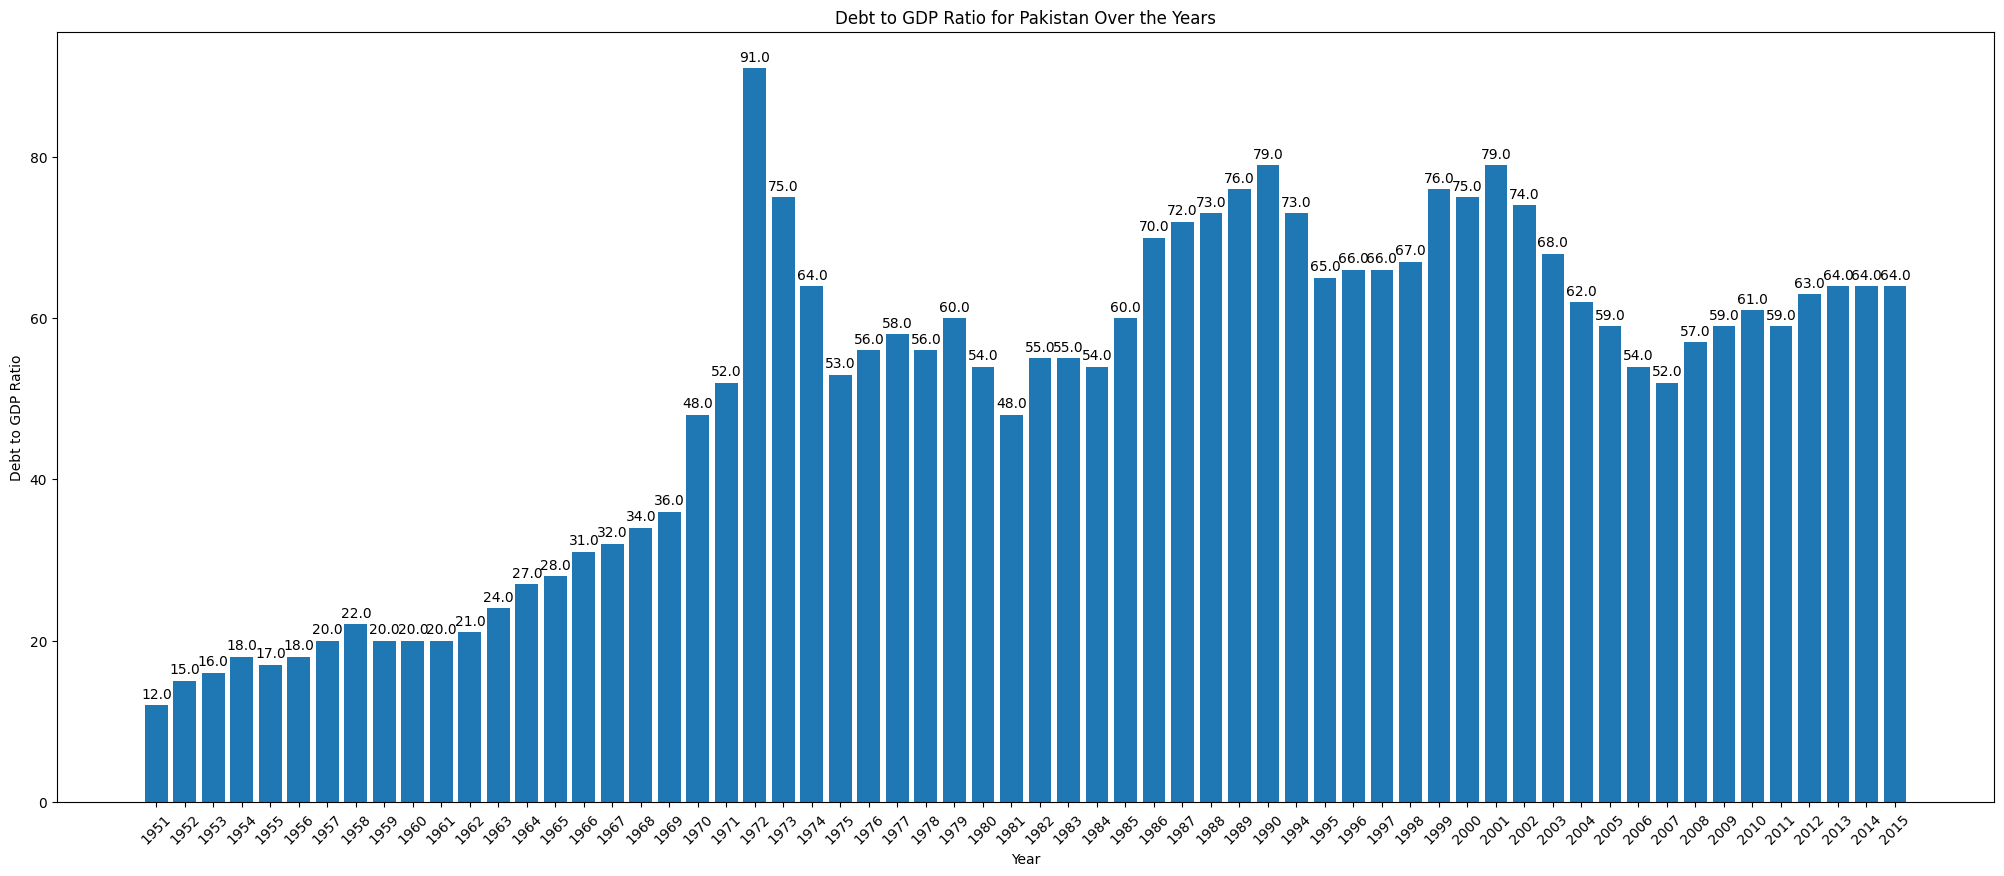

In [79]:
# Create a bar plot
plt.figure(figsize=(25, 10))

# Round off the values to 2 decimal places
pakistan_data['Debt to GDP Ratio'] = pakistan_data['Debt to GDP Ratio'].round(1)

# Create the bar chart
bars = plt.bar(pakistan_data['Year'], pakistan_data['Debt to GDP Ratio'])
plt.xlabel('Year')
plt.ylabel('Debt to GDP Ratio')
plt.title('Debt to GDP Ratio for Pakistan Over the Years')

plt.xticks(rotation=45)

# Add rounded labels on top of each bar
for bar, label in zip(bars, pakistan_data['Debt to GDP Ratio']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(label), ha='center', va='bottom')

plt.show()

In [23]:
# !pip install matplotlib seaborn pandas
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'your_data.csv' with your actual data file.
data = pd.read_csv('/content/Historical Public Debt Database.csv')
data
# # Set the 'Year' column as the index.
# data.set_index('Year', inplace=True)

# # Set the color palette (optional).
# sns.set()

# Create the heatmap plot.


Country Name  Country Code     Indicator Name  \
0                            Portugal           182  Debt to GDP Ratio   
1                               Qatar           453  Debt to GDP Ratio   
2                             Romania           968  Debt to GDP Ratio   
3                              Russia           922  Debt to GDP Ratio   
4                              Rwanda           714  Debt to GDP Ratio   
5                               Samoa           862  Debt to GDP Ratio   
6                          San Marino           135  Debt to GDP Ratio   
7               São Tomé and Príncipe           716  Debt to GDP Ratio   
8                        Saudi Arabia           456  Debt to GDP Ratio   
9                             Senegal           722  Debt to GDP Ratio   
10                             Serbia           942  Debt to GDP Ratio   
11                         Seychelles           718  Debt to GDP Ratio   
12                       Sierra Leone           724  Debt to GDP Ratio   
13                          Singapore           576  Debt to GDP Ratio   
14                             Canada           156  Debt to GDP Ratio   
15           Central African Republic           626  Debt to GDP Ratio   
16                               Chad           628  Debt to GDP Ratio   
17                              Chile           228  Debt to GDP Ratio   
18                              China           924  Debt to GDP Ratio   
19                           Colombia           233  Debt to GDP Ratio   
20                            Comoros           632  Debt to GDP Ratio   
21                           Pakistan           564  Debt to GDP Ratio   
22                             Panama           283  Debt to GDP Ratio   
23                             Norway           142  Debt to GDP Ratio   
24                               Oman           449  Debt to GDP Ratio   
25                        Switzerland           146  Debt to GDP Ratio   
26                   Papua New Guinea           853  Debt to GDP Ratio   
27                           Paraguay           288  Debt to GDP Ratio   
28                               Peru           293  Debt to GDP Ratio   
29                        Philippines           566  Debt to GDP Ratio   
30                             Poland           964  Debt to GDP Ratio   
31                            Vietnam           582  Debt to GDP Ratio   
32                              Yemen           474  Debt to GDP Ratio   
33                             Zambia           754  Debt to GDP Ratio   
34                           Zimbabwe           698  Debt to GDP Ratio   
35                          Guatemala           258  Debt to GDP Ratio   
36                             Guinea           656  Debt to GDP Ratio   
37                      Guinea-Bissau           654  Debt to GDP Ratio   
38                             Guyana           336  Debt to GDP Ratio   
39                              Haiti           263  Debt to GDP Ratio   
40                           Honduras           268  Debt to GDP Ratio   
41                  Brunei Darussalam           516  Debt to GDP Ratio   
42                        New Zealand           196  Debt to GDP Ratio   
43                          Nicaragua           278  Debt to GDP Ratio   
44                              Niger           692  Debt to GDP Ratio   
45                            Nigeria           694  Debt to GDP Ratio   
46                             Sweden           144  Debt to GDP Ratio   
47                              Italy           136  Debt to GDP Ratio   
48                    Slovak Republic           936  Debt to GDP Ratio   
49                           Slovenia           961  Debt to GDP Ratio   
50                    Solomon Islands           813  Debt to GDP Ratio   
51                       South Africa           199  Debt to GDP Ratio   
52                        South Sudan           733  Debt to GDP Ratio   
53                           